In [1]:
import sys
# append the path of the parent directory
sys.path.append("..")

In [2]:
import math
import os
import time


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

import seaborn as sns
import time
import json
import pandas as pd
from ctypes import c_int32
from itertools import product

from scipy.stats import pearsonr
from importlib import reload

from lib import sketches, visualization_utils, encoders, pacha_sketch, ploting
reload(ploting)
reload(sketches)
reload(visualization_utils)
reload(encoders)
reload(pacha_sketch)

from lib.sketches import BloomFilter, CountMinSketch, H3HashFunctions, HashFunctionFamily
from lib.visualization_utils import visualize_badic_cover, plot_b_adic_cubes
from lib.encoders import minimal_b_adic_cover, minimal_spatial_b_adic_cover
from lib.pacha_sketch import PachaSketch, SpatialPachaSketch, HilbertPachaSketch, CMParameters, BFParameters, BaselineSketch

from lib.ploting import set_style, plot_ylabel, plot_legend

# set_style()

/home/rudi/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [42]:
eps = 0.01
delta = 0.01
cm_normal = CountMinSketch(eps=eps, delta=delta)
cm_distinct = CountMinSketch(eps=eps, delta=delta)

In [40]:
size = 1000000

# stream_distinct = np.random.randint(0, size*0.9, size)
stream_distinct = np.arange(0, size, 1)
unique, counts = np.unique(stream_distinct, return_counts=True)
freq_distinct = dict(zip(unique, counts))

stream_normal = np.random.randint(0, size*0.05, size)
unique, counts = np.unique(stream_normal, return_counts=True)
freq_normal = dict(zip(unique, counts))

In [18]:
print(cm_normal.to_string())

Count-Min Sketch
depth = 5 width = 272 ; processed elements = 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
for i in stream_normal:
    cm_normal.update(i)
for i in stream_distinct:   
    cm_distinct.update(i)

In [44]:
error_distinct = []
for i in freq_distinct:
    error_distinct.append(abs(freq_distinct[i] - cm_distinct.query(i)))
error_normal = []
for i in freq_normal:
    error_normal.append(abs(freq_normal[i] - cm_normal.query(i)))

error_distinct = np.array(error_distinct)/size
error_normal = np.array(error_normal)/size


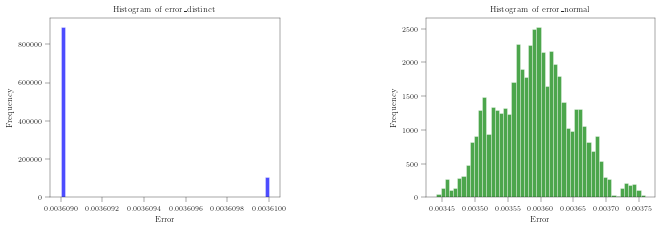

In [45]:
plt.figure(figsize=(12, 6))

# Plot histogram for error_distinct
plt.subplot(1, 2, 1)
plt.hist(error_distinct, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of error_distinct')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Plot histogram for error_normal
plt.subplot(1, 2, 2)
plt.hist(error_normal, bins=50, color='green', alpha=0.7)
plt.title('Histogram of error_normal')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

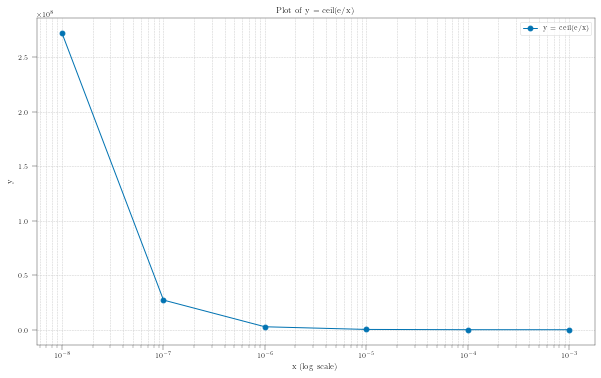

In [37]:
x_values = [10**(-i) for i in range(8, 2, -1)]  # Generate x values from 10^-8 to 10^-2
y_values = [np.ceil(math.e / x) for x in x_values]  # Compute y values
plt.rcParams.update({'font.size': 100})

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', label='y = ceil(e/x)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('x (log scale)')
plt.ylabel('y')
plt.title('Plot of y = ceil(e/x)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

/tmp/ipykernel_2409/2086747252.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


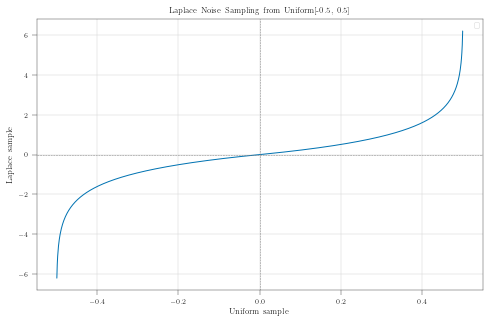

In [50]:
# Laplace sampling function
def laplace_sample(u, b):
    return -b * np.sign(u) * np.log(1 - 2 * np.abs(u))

# Parameters
b = 1.0  # scale parameter (1/epsilon)
u_vals = np.linspace(-0.499, 0.499, 1000)  # avoid -0.5 and 0.5 to stay in domain

# Compute Laplace noise
eta_vals = laplace_sample(u_vals, b)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(u_vals, eta_vals)
plt.title('Laplace Noise Sampling from Uniform[-0.5, 0.5]')
plt.xlabel('Uniform sample')
plt.ylabel('Laplace sample')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
# plt.tight_layout()
plt.show()


<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:41: SyntaxWarning: invalid escape sequence '\g'
<>:45: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\g'
<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:41: SyntaxWarning: invalid escape sequence '\g'
<>:45: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\e'
<>:46: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_270662/537089766.py:37: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(x_values, interpolated_epsilons, linestyle=line_styles[i], color=colors[i], label=f'$\gamma = {gamma}$')
/tmp/ipykernel_270662/537089766.py:41: SyntaxWarning: invalid escape sequence '\g'
  plt.plot([0, 1], [epsilon_0, epsilon_L_minus_1], color='black', alpha=0.5, label='Linear ($\gamma = 1$) 

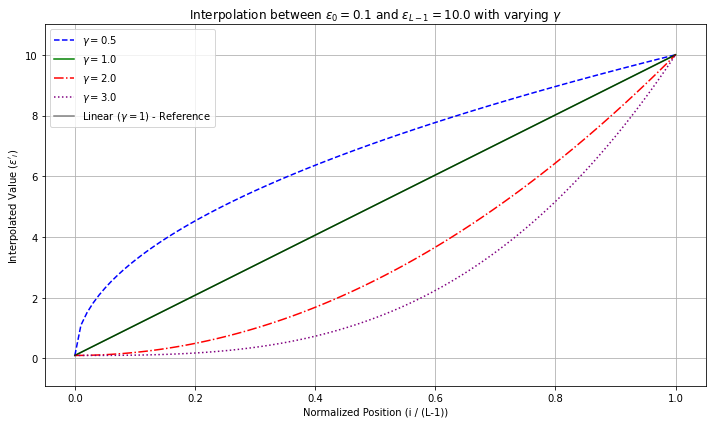

In [3]:
def interpolate_values(epsilon_start, epsilon_end, num_values, gamma):
  """
  Generates a sequence of values between epsilon_start and epsilon_end
  using a power function controlled by gamma.

  Args:
    epsilon_start (float): The starting value.
    epsilon_end (float): The ending value.
    num_values (int): The number of values to generate (L).
    gamma (float): The shape parameter.

  Returns:
    numpy.ndarray: An array of interpolated values.
  """
  if num_values < 2:
    return np.linspace(epsilon_start, epsilon_end, num_values)
  indices = np.linspace(0, 1, num_values)
  interpolated_values = epsilon_start + (epsilon_end - epsilon_start) * (indices ** gamma)
  return interpolated_values

# Set the start and end points
epsilon_0 = 0.1
epsilon_L_minus_1 = 10.0
num_points = 100  # Number of values to draw (L)

# Define different gamma values to visualize
gamma_values = [0.5, 1.0, 2.0, 3.0]
line_styles = ['--', '-', '-.', ':']
colors = ['blue', 'green', 'red', 'purple']

# Create the plot
plt.figure(figsize=(10, 6))

for i, gamma in enumerate(gamma_values):
  interpolated_epsilons = interpolate_values(epsilon_0, epsilon_L_minus_1, num_points, gamma)
  x_values = np.linspace(0, 1, num_points)  # Normalized x-axis for visualization
  plt.plot(x_values, interpolated_epsilons, linestyle=line_styles[i], color=colors[i], label=f'$\gamma = {gamma}$')

# Plot the linear case separately for clarity
linear_epsilons = interpolate_values(epsilon_0, epsilon_L_minus_1, num_points, 1.0)
plt.plot([0, 1], [epsilon_0, epsilon_L_minus_1], color='black', alpha=0.5, label='Linear ($\gamma = 1$) - Reference')

# Add labels and title
plt.xlabel("Normalized Position (i / (L-1))")
plt.ylabel("Interpolated Value ($\epsilon'_i$)")
plt.title(f"Interpolation between $\epsilon_0 = {epsilon_0}$ and $\epsilon_{{L-1}} = {epsilon_L_minus_1}$ with varying $\gamma$")
plt.legend()
plt.grid(True)
plt.ylim(min(epsilon_0, epsilon_L_minus_1) - 1, max(epsilon_0, epsilon_L_minus_1) + 1)
plt.tight_layout()
plt.show()